In [1]:
import pandas as pd

data = {'Werte': [10, 20, 30, 40, 40, 50]}
df = pd.DataFrame(data)

df['Rang_first'] = df['Werte'].rank(method='first', ascending=True)
df['Rang_min'] = df['Werte'].rank(method='min', ascending=True)
df['Rang_max'] = df['Werte'].rank(method='max', ascending=True)
df['Rang_avg'] = df['Werte'].rank(method='average', ascending=True)
df['Rang_dense'] = df['Werte'].rank(method='dense', ascending=True)
display(df)

,Werte,Rang_first,Rang_min,Rang_max,Rang_avg,Rang_dense
0,10,1.0,1.0,1.0,1.0,1.0
1,20,2.0,2.0,2.0,2.0,2.0
2,30,3.0,3.0,3.0,3.0,3.0
3,40,4.0,4.0,5.0,4.5,4.0
4,40,5.0,4.0,5.0,4.5,4.0
5,50,6.0,6.0,6.0,6.0,5.0


# Je nach eingetrager Methode werden die gespeicherten Ränge überschrieben. z.b. bei average:
    # 'first': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (4, 3, 3), (5, 2, 5)]
    # 'average': [(1, 0, 1), (2, 4, 2), (3.5, 1, 3), (3.5, 3, 3), (5, 2, 5)]
    # 'min': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (3, 3, 3), (5, 2, 5)]
    # 'max': [(1, 0, 1), (2, 4, 2), (4, 1, 3), (4, 3, 3), (5, 2, 5)]
    # 'dense': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (3, 3, 3), (4, 2, 5)]

In [2]:
import pandas as pd
from numpy import mean

# D A V E W A V E is here
# marc 4 president🦫 BOBR!
# marc 4 president🦫 BOBR!
# marc 4 president🦫 BOBR!
def avg(arg):
    return sum(arg)/len(arg)

def sort_by_og_order_and_return_only_first(liste):
    return [x[0] for x in sorted(liste, key=lambda x:x[1])]

def my_rank(values, method='average', ascending=True):
    
    # index merken [1,3,5,3,2] -> [(0, 1), (1, 3), (2, 5), (3, 3), (4, 2)]
    indices_values = list(enumerate(values))
    
    # sortieren der liste nach dem zweiten eintrag: [(0, 1), (4, 2), (1, 3), (3, 3), (2, 5)]
    sorted_indices_values = sorted(indices_values, key=lambda x: x[1])
    
    # Rang hinzufügen nach der Methode first: [(1, 0, 1), (2, 4, 2), (3, 1, 3), (4, 3, 3), (5, 2, 5)]
    # (rang, ursprünglichen index, zahl selbst)
    ranks_indices_values = [(rank, index, number) for rank, (index, number) 
                            in enumerate(sorted_indices_values, start=1)]

    # Je nach eingetrager Methode werden die gespeicherten Ränge überschrieben. z.b. bei average:
    # 'first': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (4, 3, 3), (5, 2, 5)]
    # 'average': [(1, 0, 1), (2, 4, 2), (3.5, 1, 3), (3.5, 3, 3), (5, 2, 5)]
    # 'min': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (3, 3, 3), (5, 2, 5)]
    # 'max': [(1, 0, 1), (2, 4, 2), (4, 1, 3), (4, 3, 3), (5, 2, 5)]
    # 'dense': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (3, 3, 3), (4, 2, 5)]
   
    # ranks_indices_values = [(1, 0, 1), (2, 4, 2), (3, 1, 3), (4, 3, 3), (5, 2, 5)]
    result = []
    for rank, index, number in ranks_indices_values:

        ranks_with_same_numbers_as_number = []
        for rank_sec, index_sec, number_sec in ranks_indices_values:
            if number == number_sec:
                ranks_with_same_numbers_as_number.append(rank_sec)

        if method == 'max':
            new_rank = max(ranks_with_same_numbers_as_number)
        elif method == 'min':
            new_rank = min(ranks_with_same_numbers_as_number)
        elif method == 'average':
            new_rank = avg(ranks_with_same_numbers_as_number)
        elif method == 'first':
            new_rank = rank

        result.append((new_rank, index, number))

    # Erstelle eine Liste der Ränge sortiert nach dem ursprünglichen Index
    # result = [1, 3.5, 5, 3.5, 2]
    return sort_by_og_order_and_return_only_first(result)


In [3]:
data = {"Marke": ["VW", "Audi", "Mercedes"],
        "Antrieb": ["Allrad", "Vorderrad", "hinterrad"]}

df = pd.DataFrame(data)
df

,Marke,Antrieb
0,VW,Allrad
1,Audi,Vorderrad
2,Mercedes,hinterrad


In [4]:
series = pd.Series([1,2,1,3,2,4])
print(series.value_counts())

1    2
2    2
3    1
4    1
Name: count, dtype: int64


# Sortiertes Wertediagramm

Wert
0    1
1    1
2    2
3    2
4    2
5    3
Name: count, dtype: int64

<Axes: xlabel='Wert'>

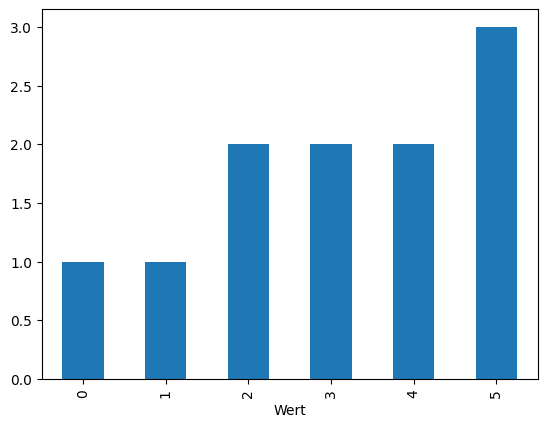

In [5]:
data = [5, 3, 2, 3, 4, 4, 5, 2, 1, 5, 0]

df = pd.DataFrame(data, columns=["Wert"])


df = df["Wert"].value_counts().sort_index()
display(df)

df.plot(kind="bar")


Erstelle in Pandas ein DataFrame mit den folgenden Werten in einer Spalte:
 
daten = [1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 9, 10]
 
Erstelle ein DataFrame, dass die Daten zunächst klassiert und dann die absoluten und relativen Häufigkeiten anzeigt:
 
Beispielausgabe:

Klasse	Absolute Häufigkeit	Relative Häufigkeit
(0, 3]	4	0.20
(3, 6)	8	0.40
(6, 9)	7	0.35
(9, 12)	1	0.05
 
Beachte, dass dieses Dataframe 2 Spalten hat und als Index die Klassen genutzt werden.
 
Nutze, um diese Aufgabe zu erfüllen pandas Funktionen (es werden keine for-schleifen benötigt)

In [6]:
daten = [1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 9, 10]
bins = [0, 3, 6, 9, 12]

series = pd.Series(daten)

classiefied_series = pd.cut(series, bins=bins, right=True)

abs_frequency = classiefied_series.value_counts()
rel_frequency = abs_frequency / len(series)

classified_df = pd.DataFrame({
    "Absolute Häufigkeit": abs_frequency,
    "Relative Häufigkeit": rel_frequency
})

display(classified_df)

,Absolute Häufigkeit,Relative Häufigkeit
"(3, 6]",8,0.40
"(6, 9]",7,0.35
"(0, 3]",4,0.20
"(9, 12]",1,0.05


Erstelle, für die letzte Aufgabe eine Funktion 'get_counts(ser, bins)', welche eine Series erwartet und das oben angegebene DataFrame zurückgibt. Schreibe hierfür Tests. (die Funktion get_counts kann bestenfalls noch mit anderen Parametern umgehen, um das zusammenspiel mit der cut-Funktion zu ermöglichen. Überlege, wie dies mit *args und **kwargs umgesetzt wird)

In [7]:
def get_counts(series, bins, **cut_kwargs):
    classiefied_series = pd.cut(series, bins=bins, **cut_kwargs)
    
    classified_df = pd.DataFrame({
    "Absolute Häufigkeit": classiefied_series.value_counts(),
    "Relative Häufigkeit": classiefied_series.value_counts(normalize=True)
    }).sort_index()
    
    return classified_df

get_counts(pd.Series([1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 9, 10]), [0, 3, 6, 9, 12], right=True)

,Absolute Häufigkeit,Relative Häufigkeit
"(0, 3]",4,0.20
"(3, 6]",8,0.40
"(6, 9]",7,0.35
"(9, 12]",1,0.05


# Wie kann man aus der Funktion 'get_counts' eine Methode der Klasse 'Series' machen, sodass direkt ser.get_counts() aufgerufen werden kann?

In [8]:
pd.Series.get_counts = get_counts

In [9]:
serie = pd.Series([1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 9, 10])

serie.get_counts([0, 3, 6, 9, 12], right=True)

,Absolute Häufigkeit,Relative Häufigkeit
"(0, 3]",4,0.20
"(3, 6]",8,0.40
"(6, 9]",7,0.35
"(9, 12]",1,0.05


# Pandas Treppendiagram

In [10]:
import ast

data = "[127; 120; 133; 94; 133; 120; 133; 133; 113; 94; 230; 120; 230; 80; 113; 80; 120; 250; 133; 106]"
data = data.replace(";", ",")
data_list = ast.literal_eval(data)
data_series = pd.Series(data_list)

df = pd.DataFrame({
    "Absolute Häufigkeit": data_series.value_counts(),
    "Relative Häufigkeit": data_series.value_counts(normalize=True)
}).sort_index()

display(df)


,Absolute Häufigkeit,Relative Häufigkeit
80,2,0.10
94,2,0.10
106,1,0.05
113,2,0.10
120,4,0.20
127,1,0.05
133,5,0.25
230,2,0.10
250,1,0.05


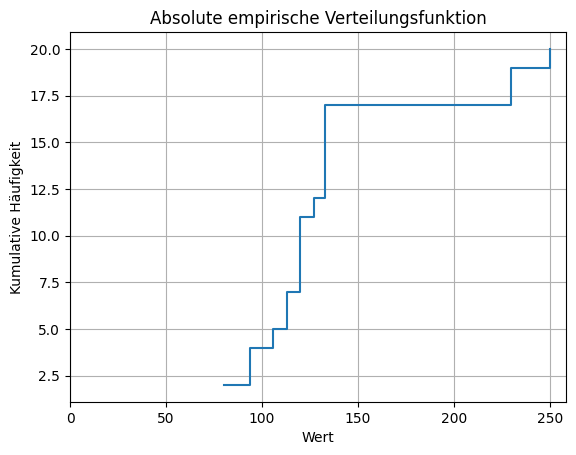

In [11]:
import matplotlib.pyplot as plt

# Gegebene Daten
data = "[127; 120; 133; 94; 133; 120; 133; 133; 113; 94; 230; 120; 230; 80; 113; 80; 120; 250; 133; 106]"
data = data.replace(";", ",")
data_list = ast.literal_eval(data)
data_series = pd.Series(data_list)

# Daten in DataFrame
df = pd.DataFrame(data_series, columns=["Wert"])

# Kumulative absolute Häufigkeiten berechnen
df["Kumulative Häufigkeit"] = df["Wert"].rank(method="max").astype(int)

# Entferne Duplikate für die AEVF
aevf_df = df.drop_duplicates(subset=["Wert"]).sort_values(by="Wert")

# Plot der AEVF
plt.step(aevf_df["Wert"], aevf_df["Kumulative Häufigkeit"], where="post")
plt.title("Absolute empirische Verteilungsfunktion")
plt.xlim(left=0)
plt.xlabel("Wert")
plt.ylabel("Kumulative Häufigkeit")
plt.grid()
plt.show()


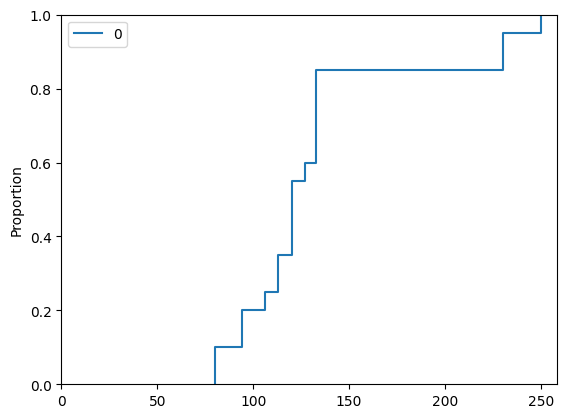

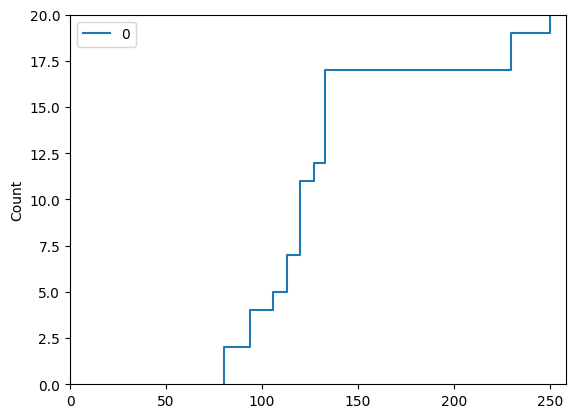

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame([127, 120, 133, 94, 133, 120, 133, 133, 113, 94, 230, 120, 230, 80, 113, 80, 120, 250, 133, 106])
sns.ecdfplot(data=df)
plt.xlim(left=0)
plt.show()
sns.ecdfplot(stat = "count", data=df)
plt.xlim(left=0)
plt.show()

# Modal-Wert

In [13]:
import numpy as np
def my_modus(liste):    
    if not liste:        
        return np.nan   
    return _my_modus(liste)

def _my_modus(liste):    
    frequency = {value: liste.count(value) for value in set(liste)}    
    return max(frequency, key=frequency.get)

In [14]:
def get_modal_value(data):
    if not data:
        raise ValueError("Cant calculate Modal value for empty array like sequence.")
    my_dict = {}
    for num in sorted(data):
        my_dict[num] = my_dict.get(num, 0) + 1

    max_val = max(my_dict.values())
    modal_val = [key for key, value in my_dict.items() if max_val == value]
    return modal_val

In [15]:
import unittest
from parameterized import parameterized

class TestModalValue(unittest.TestCase):
    
    @parameterized.expand([
        [[127, 120, 133, 94, 133, 120, 133, 133, 113, 94, 230, 120, 230, 80, 113, 80, 120, 250, 133, 106, 44, 44, 44, 44, 44], [44, 133]],
        [[1, 2, 3, 3, 3, 4, 5, 6, 6, 7], [3]],
        [[1, 1, 1, 2, 3, 4, 5, 5, 5, 5], [5]],
        [["pink", "silber", "pink"], ["pink"]],
        [["a", "b", "b", "a", "c", "a"], ["a"]],
        [["dog", "cat", "dog", "dog", "mouse", "cat"], ["dog"]]
    ])
    
    def test_modal_val_success(self, values, expected):
        self.assertEqual(get_modal_value(values), expected)
    
    def test_value_error(self):
        with self.assertRaises(ValueError) as context:
            get_modal_value([])
        self.assertEqual(str(context.exception), "Cant calculate Modal value for empty array like sequence.")
    
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.002s

OK


# Mean-Wert

In [16]:
def get_mean_value(data):
    if not data:
        raise ValueError("The input data is empty. Cannot calculate mean value.")

    if not isinstance(data, (list, tuple, set)):
        raise TypeError("Input data must be a list, tuple, or set.")

    if not all(isinstance(x, (int, float)) for x in data):
        raise ValueError("All elements in the input data must be numeric.")
    
    return sum(data) / len(data)

In [17]:
import unittest
from parameterized import parameterized

class TestMeanValue(unittest.TestCase):
    
    @parameterized.expand([
        [[1, 2, 3, 4, 5], 3.0],
        [[10, 10, 10, 10], 10.0],
        [[0], 0.0]
    ])
    def test_mean_value_success(self, values, expected):
        self.assertAlmostEqual(get_mean_value(values), expected)

    def test_empty_data(self):
        with self.assertRaises(ValueError) as context:
            get_mean_value([])
        self.assertEqual(str(context.exception), "The input data is empty. Cannot calculate mean value.")
        
    def test_invalid_type(self):
        with self.assertRaises(TypeError) as context:
            get_mean_value("string instead of list")
        self.assertEqual(str(context.exception), "Input data must be a list, tuple, or set.")
        
    def test_non_numeric_values(self):
        with self.assertRaises(ValueError) as context:
            get_mean_value([1, 2, "three", 4])
        self.assertEqual(str(context.exception), "All elements in the input data must be numeric.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.............
----------------------------------------------------------------------
Ran 13 tests in 0.004s

OK


# Median-Wert

In [18]:
def get_median_value(data):
    if not data:
        raise ValueError("The input data is empty. Cannot calculate median value.")
    
    if not isinstance(data, (list, tuple, set)):
        raise TypeError("Input data must be a list, tuple, or set.")
    
    if not all(isinstance(x, (int, float)) for x in data):
        raise ValueError("All elements in the input data must be numeric.")

    data = sorted(data)
    n = len(data)
    
    if n % 2 != 0:
        return data[n // 2]
    else:
        return 0.5 * (data[(n // 2) - 1] + data[n // 2])

In [19]:
import unittest
from parameterized import parameterized

class TestMedianValue(unittest.TestCase):
    
    @parameterized.expand([
        [[1, 2, 3, 4, 5], 3],
        [[1, 2, 3, 4, 5, 6], 3.5],
        [[10], 10],
        [[2, 8, 4, 6], 5.0],
        [[0, 0, 0, 0], 0],
        [[-5, -10, -3], -5]
    ])
    def test_median_value_success(self, values, expected):
        self.assertEqual(get_median_value(values), expected)

    def test_empty_data(self):
        with self.assertRaises(ValueError) as context:
            get_median_value([])
        self.assertEqual(str(context.exception), "The input data is empty. Cannot calculate median value.")

    def test_invalid_type(self):
        with self.assertRaises(TypeError) as context:
            get_median_value("string instead of list")
        self.assertEqual(str(context.exception), "Input data must be a list, tuple, or set.")

    def test_non_numeric_values(self):
        with self.assertRaises(ValueError) as context:
            get_median_value([1, 2, "three", 4])
        self.assertEqual(str(context.exception), "All elements in the input data must be numeric.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

......................
----------------------------------------------------------------------
Ran 22 tests in 0.005s

OK


# Modal, Mean und Median in pandas

In [20]:
import pandas as pd

data = {'Wert': [127, 120, 133, 94, 133, 120, 133, 133, 113, 94, 230, 120, 230, 80, 113, 80, 120, 250, 133, 106]}
df = pd.DataFrame(data)

modal_value = df['Wert'].mode()[0]
mean_value = df['Wert'].mean()
median_value = df['Wert'].median()

# Ausgabe
print(f"Modalwert: {modal_value}")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

Modalwert: 133
Mean: 133.1
Median: 120.0


# Varianz

In [21]:
def variance(data):
    if not isinstance(data, (list, tuple)):
        raise TypeError("Data must be a list or tuple of numbers.")
    if not data:
        raise ValueError("Cannot calculate variance of an empty dataset.")
    if not all(isinstance(num, (int, float)) for num in data):
        raise ValueError("All elements in the dataset must be numeric.")
    
    arithmetic_mean = sum(data) / len(data)
    return sum([(num - arithmetic_mean)**2 for num in data]) / len(data)

In [22]:
def standard_deviation(data):
    if not isinstance(data, (list, tuple)):
        raise TypeError("Data must be a list or tuple of numbers.")
    if not data:
        raise ValueError("Cannot calculate standard deviation of an empty dataset.")
    if not all(isinstance(num, (int, float)) for num in data):
        raise ValueError("All elements in the dataset must be numeric.")
    
    return variance(data)**0.5

In [23]:
import unittest
from parameterized import parameterized

class TestVariance(unittest.TestCase):
    
    @parameterized.expand([
        [[23, 16, 18, 17, 22, 28, 26, 22, 20, 8], 29],
        [[27, 22, 21, 26, 27, 35, 31, 24, 22, 15], 28],
        [[27, 27, 27], 0],
        [[10], 0]
    ])
    def test_variance_success(self, values, expected):
        self.assertEqual(variance(values), expected)
    
    @parameterized.expand([
        [[23, 16, 18, 17, 22, 28, 26, 22, 20, 8], 5.39],
        [[27, 22, 21, 26, 27, 35, 31, 24, 22, 15], 5.29],
        [[4, 4, 4], 0.0],
        [[10], 0]
    ])
    def test_standard_deviation_success(self, values, expected):
        self.assertAlmostEqual(standard_deviation(values), expected, delta=0.01)
    
    # Tests für Fehlerfälle
    def test_variance_empty_dataset(self):
        with self.assertRaises(ValueError) as context:
            variance([])
        self.assertEqual(str(context.exception), "Cannot calculate variance of an empty dataset.")
    
    def test_variance_non_numeric(self):
        with self.assertRaises(ValueError) as context:
            variance([1, "a", 3])
        self.assertEqual(str(context.exception), "All elements in the dataset must be numeric.")
    
    def test_variance_invalid_type(self):
        with self.assertRaises(TypeError) as context:
            variance("not a list")
        self.assertEqual(str(context.exception), "Data must be a list or tuple of numbers.")
    
    def test_standard_deviation_empty_dataset(self):
        with self.assertRaises(ValueError) as context:
            standard_deviation([])
        self.assertEqual(str(context.exception), "Cannot calculate standard deviation of an empty dataset.")
    
    def test_standard_deviation_non_numeric(self):
        with self.assertRaises(ValueError) as context:
            standard_deviation([1, "a", 3])
        self.assertEqual(str(context.exception), "All elements in the dataset must be numeric.")
    
    def test_standard_deviation_invalid_type(self):
        with self.assertRaises(TypeError) as context:
            standard_deviation({"a": 1})
        self.assertEqual(str(context.exception), "Data must be a list or tuple of numbers.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

....................................
----------------------------------------------------------------------
Ran 36 tests in 0.009s

OK


# Lineare Regression

In [24]:
import numpy as np

def linear_regression(data):
    if not isinstance(data, list):
        raise TypeError("Input data must be a list of tuples.")
    if len([x for x, y in data]) != len([y for x, y in data]):
        raise ValueError("The number of values for x and y must be the same.")
    if len(data) < 2:
        raise ValueError("At least two data points are required for linear regression.")
    if not all(isinstance(point, tuple) and len(point) == 2 for point in data):
        raise ValueError("Each element in the data list must be a tuple with exactly two numeric values.")
    if not all(isinstance(x, (int, float)) and isinstance(y, (int, float)) for x, y in data):
        raise ValueError("All elements in the tuples must be numeric values.")
    
    x_vals = [x[0] for x in data]
    y_vals = [y[1] for y in data]
    
    if len(set(x_vals)) == 1:
        raise ValueError("All x-values are the same. Linear regression is undefined.")
    
    x_mean, y_mean = np.mean(x_vals), np.mean(y_vals)
    nominator = sum((xi - x_mean) * (yi - y_mean) for xi, yi in data)
    denominator = sum((xi - x_mean) ** 2 for xi in x_vals)
    byx = nominator / denominator
    ayx = y_mean - byx * x_mean
    
    return ayx, byx

def calculate_y(data, value):
    if not isinstance(value, (int, float)):
        raise TypeError("The x-value must be a numeric value.")
    ayx, byx = linear_regression(data)
    return ayx + byx * value


In [25]:
class TestLinearRegression(unittest.TestCase):

    @parameterized.expand([
        [[(4, 50), (7, 80), (11, 70), (2, 45)], (41.68, 3.26)],
        [[(1, 2), (2, 4), (3, 6), (4, 8)], (0, 2)],
        [[(10, 20), (20, 40)], (0, 2)],
    ])
    def test_linear_regression_success(self, data, expected):
        ayx, byx = linear_regression(data)
        self.assertAlmostEqual(ayx, expected[0], delta=0.01)
        self.assertAlmostEqual(byx, expected[1], delta=0.01)

    def test_empty_data(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([])
        self.assertEqual(str(context.exception), "At least two data points are required for linear regression.")

    def test_one_data_point(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([(1, 2)])
        self.assertEqual(str(context.exception), "At least two data points are required for linear regression.")

    def test_same_x_values(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([(1, 2), (1, 3)])
        self.assertEqual(str(context.exception), "All x-values are the same. Linear regression is undefined.")

    def test_non_numeric_values(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([("a", 2), (3, 4)])
        self.assertEqual(str(context.exception), "All elements in the tuples must be numeric values.")

    def test_invalid_data_format(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([(1, 2), [3, 4]])
        self.assertEqual(str(context.exception), "Each element in the data list must be a tuple with exactly two numeric values.")


class TestCalculateY(unittest.TestCase):

    @parameterized.expand([
        [[(1, 2), (2, 4)], 3, 6.0],
        [[(10, 20), (20, 40)], 15, 30.0],
        [[(1, 2), (2, 4), (3, 6), (4, 8), (5, 10)], 6, 12.0],
        [[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)], 10, 10.0],
        [[(1, 1), (2, 3)], 1.5, 2.0],
        [[(1, 1), (2, 2), (3, 3)], -1, -1.0],
        [[(1, 1), (2, 2), (3, 3)], 0, 0.0],
    ])
    def test_calculate_y_success(self, test_list, value, expected):
        self.assertAlmostEqual(calculate_y(test_list, value), expected, delta=0.01)

    def test_empty_data(self):
        with self.assertRaises(ValueError) as context:
            calculate_y([], 5)
        self.assertEqual(str(context.exception), "At least two data points are required for linear regression.")

    def test_invalid_x_value(self):
        with self.assertRaises(TypeError) as context:
            calculate_y([(4, 50), (7, 80)], "five")
        self.assertEqual(str(context.exception), "The x-value must be a numeric value.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.....................................................
----------------------------------------------------------------------
Ran 53 tests in 0.012s

OK


# Eindimensionale lineare Regression

In [26]:
import numpy as np
from unittest import TestCase, main
from parameterized import parameterized

def one_dimensional_regression(x, y):
    ones_x = np.vstack((
        np.ones(len(x)),  # Erste Zeile: Einsen
        x  # Zweite Zeile: Die unabhängige Variable
    ))

    return np.linalg.inv(ones_x @ ones_x.T) @ ones_x @ np.array(y).T



class TestDeviation(TestCase):
    @parameterized.expand([
        ([1, 2, 3], [1, 2, 3], 0, 1),  # no bias
        ([1, 2, 3], [2, 4, 6], 0, 2),  # no bias
        ([0, 1, 2], [3, 2, 1], 3, -1),  # negative
        ([0, 1, 2], [1, 2, 3], 1, 1),  # basic
        ([1, 2, 3], [3, 5, 7], 1, 2),  # basic
        ([0, 1, 2], [1, 1, 1], 1, 0),  # constant function
        ([1, 2, 3], [3, 3, 3], 3, 0),  # contant function
    ])
    def test_basic_lin_reg(self, x, y, a, b):
        result = one_dimensional_regression(x, y)
        self.assertAlmostEqual(float(result[0]), a)
        self.assertAlmostEqual(float(result[1]), b)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

............................................................
----------------------------------------------------------------------
Ran 60 tests in 0.015s

OK


# Multiple lineare Regression

In [27]:
import numpy as np
from unittest import TestCase, main
from parameterized import parameterized

def multiple_regression(x, y):
    ones_x = np.vstack((
        np.ones(len(x[0])),
        x
    ))
    
    return np.linalg.inv(ones_x @ ones_x.T) @ ones_x @ np.array(y).T
    

class TestDeviation(TestCase):
    @parameterized.expand([
        ([[1], [2], [3]], [2, 4, 6], 0, 2),
    ])
    def test_basic_lin_reg(self, x, y, a, b):
        result = one_dimensional_regression(x, y)
        self.assertAlmostEqual(float(result[0]), a)
        self.assertAlmostEqual(float(result[1]), b)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.........E............................................
ERROR: test_basic_lin_reg_0 (__main__.TestDeviation.test_basic_lin_reg_0)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.venv/lib/python3.13/site-packages/parameterized/parameterized.py", line 620, in standalone_func
    return func(*(a + p.args), **p.kwargs, **kw)
  File "/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_8718/2264101851.py", line 19, in test_basic_lin_reg
    result = one_dimensional_regression(x, y)
  File "/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_8718/293602746.py", line 6, in one_dimensional_regression
    ones_x = np.vstack((
        np.ones(len(x)),  # Erste Zeile: Einsen
        x  # Zweite Zeile: Die unabhängige Variable
    ))
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.venv/lib/pyt

In [ ]:
def own_quantiles(parts, number_list):
    if not number_list:
        raise ValueError("Liste darf nicht leer sein.")
    if parts < 1:
        raise ValueError("Mind. ein Quantil.")
    
    sorted_number_list = sorted(number_list)
    n = len(sorted_number_list)
    
    quantiles = []
    
    for i in range(1, parts):
        p_quantil = i / parts
        pos = n * p_quantil - 1 # -1 weil Listen bei 0 starten
        if pos % 1 == 0:
            pos = int(pos + 1)
            quantiles.append(0.5*(number_list[pos]+ number_list[pos+1]))
        else:
            quantiles.append(number_list[int(pos+1)])
        
    return quantiles
        

print(own_quantiles(4, [1, 3, 7, 8, 9, 13, 15]))
print(own_quantiles(5, [0,1,2,3,4,5,6,7,8,9,10]))
print(own_quantiles(5, [0,1,2]))

[3, 8, 13]
[2, 4, 6, 8]
[0, 1, 1, 2]


# Schätzung Siedler Würfel wahrscheinlichkeit der Ereignisse
Die Zahlen in der Mitte werden durch die häufigsten Kombinationen am wahrscheinlichsten gewürfelt.

# Händische Rechnung
2: Anzahl der Kombinationen  = 1 (1,1)
3: Anzahl der Kombinationen  = 2 (1,2), (2,1)
4: Anzahl der Kombinationen  = 3 (1,3), (2,2), (3,1)
5: Anzahl der Kombinationen  = 4 usw. 
6: Anzahl der Kombinationen  = 5 
7: Anzahl der Kombinationen  = 6
8: Anzahl der Kombinationen  = 5
9: Anzahl der Kombinationen  = 4
10: Anzahl der Kombinationen = 3
11: Anzahl der Kombinationen = 2
12: Anzahl der Kombinationen = 1

P(Anzahl der Kombinationen) = Anzahl der Kombinationen / Anzahl der Ergebnisse

z.B. für die Zahl 2

P(2) = 1 / 36
P(3) = 2 / 36 = 1/18
P(4) = 3 / 36 = 1/12
P(5) = 4 / 36 = 1/9
usw.

# Siedler von Catan Würfelergebnis wahrscheinlichkeit

In [ ]:
from random import randint

def get_posibilities(tosses, cube_1=(1, 6), cube_2=(1, 6)):
    frequency = {}
    for _ in range(tosses):
        res = randint(cube_1[0], cube_1[1]) + randint(cube_2[0], cube_2[1])
        frequency[res] = frequency.get(res, 0) + 1
            
    sorted_frequency = dict(sorted(frequency.items()))
    
    relative_frequency = {key: value / tosses for key, value in sorted_frequency.items()}
     
    return relative_frequency

print(get_posibilities(100, (1, 6), (1, 4)))

{2: 0.05, 3: 0.09, 4: 0.14, 5: 0.17, 6: 0.16, 7: 0.15, 8: 0.14, 9: 0.06, 10: 0.04}


# Monty Hall Simulation

In [100]:
import random

def monty_hall_simulation(num_simulations, switch=True):
    win_count = 0

    for _ in range(num_simulations):
        doors = [0, 1, 2]
        winning_door = random.choice(doors)
        player_choice = random.choice(doors)

        doors_to_open = [door for door in doors if door != winning_door and door != player_choice]
        door_opened = random.choice(doors_to_open)

        if switch:
            remaining_door = [door for door in doors if door != player_choice and door != door_opened][0]
            player_choice = remaining_door
            
        if player_choice == winning_door:
            win_count += 1

    return win_count

simulations = 100000

print(monty_hall_simulation(simulations, switch=False)/simulations)

print(monty_hall_simulation(simulations, switch=True)/simulations)

0.33458
0.66622
